# **Task**
* Step 1: Download the dataset from the link available above.
*   Step 2: Perform proper analysis of the dataset and draw conclusions based on your analysis.
*   Step 3: Build a Machine Learning Model to predict output based on the input column.

* Step 4: Make sure to apply:
  * Proper outlier detection and treatment.
  * Feature Engineering
  * Hyperparameter Tuning
* Step 5: Use appropriate evaluation metrics and compare all the models and write your observations i.e. why is one model better than the other?
* Step 6: Build a Linear Regression model by performing appropriate feature engineering.


In [11]:
#importing all reqired dataset
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import preprocessing, svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Step 01: Loading dataset

In [3]:
df = pd.read_csv('dataframe_.csv')
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


## Step 02: Dataset Analysis
n this step, given data was gathered and loaded as a dataframe using Pandas. After this, checked information about the null and non-null data using info() function. The number of not-empty values, average value, standard deviation, minimum value, and minimum value are all displayed by the describe() function. The percentages 25%, 50%, and 75% indicate how many values fall below the specified percentile. Then, a box plot is constructed, with a vertical line passing through the box at the median and a box that spans the first through third quartiles. The scatter matrix is plotted to help understand the relationship between the features. Finally, the data has been splited into train, test and validation set.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


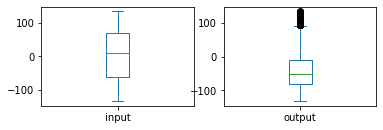

In [7]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

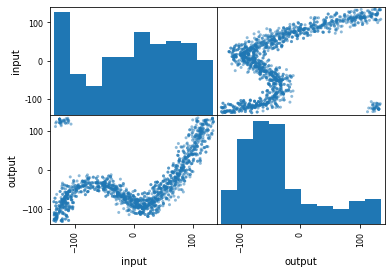

In [12]:
scatter_matrix(df)
plt.show()

## Step 04: Outlier detection and treatment, Feature Engineering

### Outlier detection and treatment

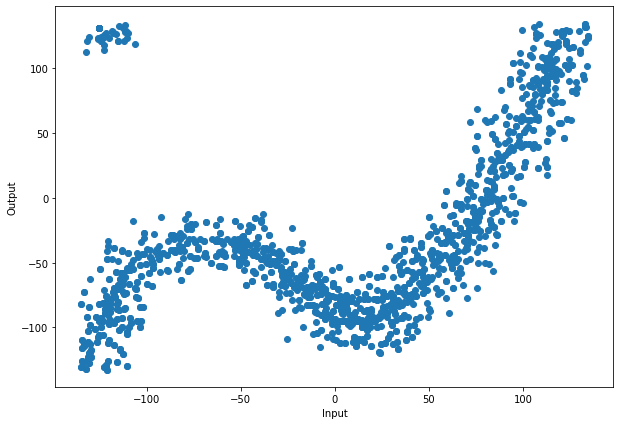

In [13]:
#detecting outlier detection
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(df['input'], df['output'])
ax.set_xlabel('Input')
ax.set_ylabel('Output')
plt.show()

In [14]:
#Position of the Outlier
outliers = np.where((df['input']<-50) & (df['output']>100))
outliers

(array([1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082,
        1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093,
        1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104,
        1105, 1106, 1107, 1108, 1109, 1110]),)

In [15]:
df.drop(outliers[0],inplace = True)

In [16]:
#removal
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1657 non-null   float64
 1   output  1657 non-null   float64
dtypes: float64(2)
memory usage: 38.8 KB


### Feature Engineering

In [18]:
X = np.array(df['input']).reshape(-1, 1)
y = np.array(df['output']).reshape(-1, 1)

In [19]:
len(X), len(y)

(1657, 1657)

In [20]:
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [21]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1242, 415, 1242, 415)

## Step 03: Building Machine Learning Model

### Support Vector Regressor

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [26]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

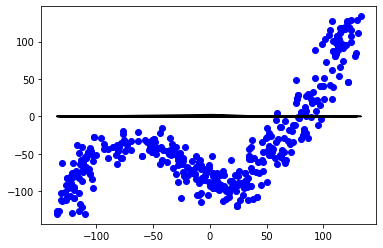

In [27]:
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [28]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 66.43746868154508
MSE: 5387.667885644536
RMSE: 73.40073491215558


### Random Forest with Hyperparameter Tuning

In [29]:
X = np.array(df['input']).reshape(-1, 1)
y = np.array(df['output']).reshape(-1, 1)

In [30]:
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [31]:
rf = RandomForestRegressor(random_state = 42)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [32]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, 150],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [150, 200, 250, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [33]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 108 candidates, totalling 216 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 150,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 250}

In [34]:
best_grid = grid_search.best_estimator_

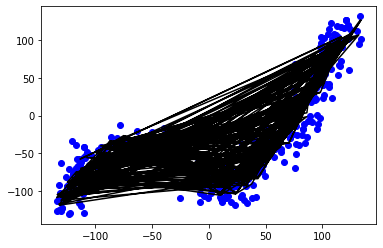

In [35]:
y_pred = best_grid.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [36]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 15.58026313134815
MSE: 424.78811438094897
RMSE: 20.610388506307903


## Step 05: Evaluation
For evaluation, we will use Mean Average Error (MAE), the Mean Squared Error (MSE) or the Root Mean Squared Error (RMSE). The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model.

and SVM gives:
* MAE: 66.43746868154508
* MSE: 5387.667885644536
* RMSE: 73.40073491215558 

Random Forest gives: 
* MAE: 15.58026313134815
* MSE: 424.78811438094897
* RMSE: 20.610388506307903

We can see, Random Forest performed better them SVM, cause it has less overfitting, Better Handling of Non-Linear Relationships,and especially more Parameters. To make the output better we can use, linear regression model, where we can use it by adding more parameters, such as polynomial or interaction terms, or you could try transforming the independent variables to make the relationship between the variables more linear. \n 
Or maybe Neural Networks can be introduced.

## Step 06: Linear Regression

In [37]:
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.43757470447482283


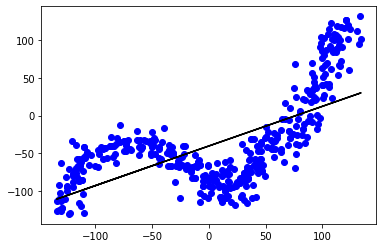

In [38]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [39]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 39.64537278166865
MSE: 2176.553612276515
RMSE: 46.65354876401703
